In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/18_jan/lupus_dataset.csv')
df.head()

,ana,fever,leukopenia,thrombocytopenia,auto_immune_hemolysis,delirium,psychosis,seizure,non_scarring_alopecia,oral_ulcers,...,joint_involvement,proteinuria,anti_cardioliphin_antibodies,anti_β2gp1_antibodies,lupus_anti_coagulant,low_c3,low_c4,anti_dsdna_antibody,anti_smith_antibody,label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
len(df)

70000

In [4]:
df.fever.value_counts()

0    60334
1     9666
Name: fever, dtype: int64

In [5]:
#df['proteinuria'].plot(kind='kde')

<AxesSubplot:title={'center':'Lupus Class Distribution'}, xlabel='label', ylabel='count'>

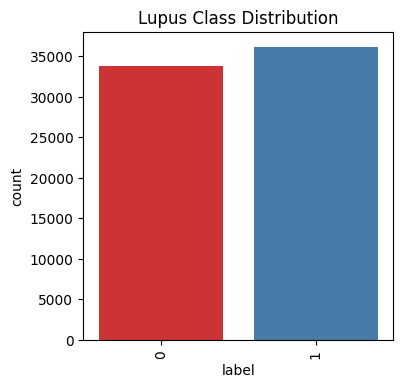

In [6]:
plt.figure(figsize=(4, 4))
plt.xticks(rotation=90)
plt.title('Lupus Class Distribution')
sns.countplot(x='label', data=df, palette = 'Set1')

In [21]:
df.label.value_counts()

1    36233
0    33767
Name: label, dtype: int64

#### Feature fractions for positive ana dataset

In [21]:
feature_fractions = {'fever':0.36, 'leukopenia':0.50, 'thrombocytopenia':0.20, 'auto_immune_hemolysis':0.03, 
                     'delirium':0.49, 'psychosis':0.12, 'seizure':0.11, 'non_scarring_alopecia':0.85, 
                     'oral_ulcers':0.08, 'pleural_effusion': 0.17, 'pericardial_effusion':0.50, 
                     'acute_pericarditis':0.01, 'joint_involvement':0.69, 'proteinuria':0.60, 
                     'anti_cardioliphin_antibodies':0.17, 'anti_β2gp1_antibodies':0.10, 'lupus_anti_coagulant':0.11,
                     'low_c3':0.38, 'low_c4':0.39,'anti_dsdna_antibody':0.70, 'anti_smith_antibody':0.09}

# sorted_feature_fractions = {k: v for k, v in sorted(feature_fractions.items(), key=lambda item: item[1])}
sorted_feature_fractions = dict(sorted(feature_fractions.items(), key=lambda x: x[1], reverse=True))
sorted_feature_fractions

{'non_scarring_alopecia': 0.85,
 'anti_dsdna_antibody': 0.7,
 'joint_involvement': 0.69,
 'proteinuria': 0.6,
 'leukopenia': 0.5,
 'pericardial_effusion': 0.5,
 'delirium': 0.49,
 'low_c4': 0.39,
 'low_c3': 0.38,
 'fever': 0.36,
 'thrombocytopenia': 0.2,
 'pleural_effusion': 0.17,
 'anti_cardioliphin_antibodies': 0.17,
 'psychosis': 0.12,
 'seizure': 0.11,
 'lupus_anti_coagulant': 0.11,
 'anti_β2gp1_antibodies': 0.1,
 'anti_smith_antibody': 0.09,
 'oral_ulcers': 0.08,
 'auto_immune_hemolysis': 0.03,
 'acute_pericarditis': 0.01}

Text(0.5, 1.0, 'Positive Fractions of Features')

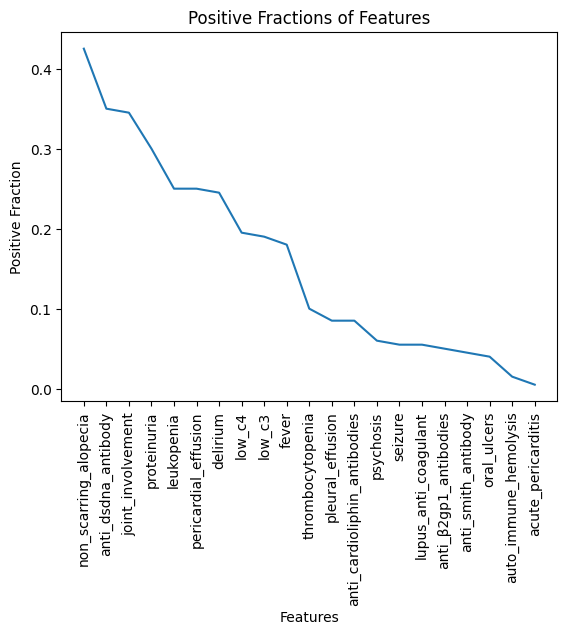

In [26]:
plt.plot(sorted_feature_fractions.keys(), [i/2 for i in sorted_feature_fractions.values()])
plt.xticks(rotation = 90) 
plt.xlabel('Features')
plt.ylabel('Positive Fraction')
plt.title('Positive Fractions of Features')

#### Plotting weights vs proportion of positives

Text(0.5, 1.0, 'Positive Samples vs Weight')

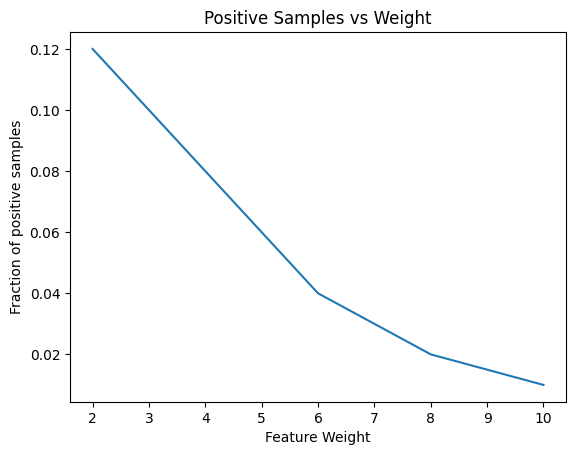

In [27]:
weight_prob_dict = {10:0.01, 8:0.02, 6:0.04, 5:0.06, 4:0.08, 3:0.10, 2:0.12}
plt.plot(weight_prob_dict.keys(), weight_prob_dict.values())
plt.xlabel('Feature Weight')
plt.ylabel('Fraction of positive samples')
plt.title('Positive Samples vs Weight')

In [23]:
pltly_dict = {'weight':list(weight_prob_dict.keys()), 'proportion': list(weight_prob_dict.values())}
px.scatter(pltly_dict, x='weight', y='proportion', size='proportion', color = 'weight', width=600, height=400)

#### Plotting cutaneous lupus proportions

In [29]:
labels = ['None', 'Subacute cutaneous lupus', 'Acute cutaneous lupus', 'Discoid lupus']
values = [0.57, 0.15, 0.10, 0.18]
fig = px.pie(values=values, names=labels)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Cutaneous Lupus', title_x=0.5)
fig.show()

#### Plotting C3 / C4 proportions

In [14]:
labels = ['0', '1']
values = [0.4, 0.6]
fig = px.pie(values=values, names=labels)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='C3/C4', title_x=0.5)
fig.show()

#### Ploting proportion of missing values

In [26]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(6,4), stacked=True, title='Proportion of Missing Values')
    return output_df

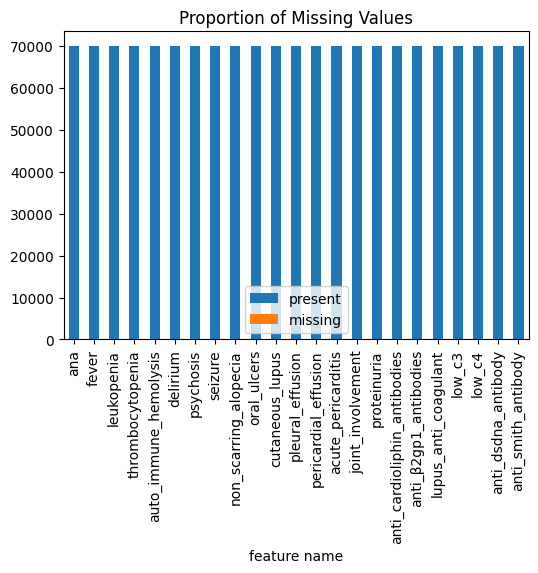

In [27]:
output_df = plot_feature_frequencies(df)

#### Plotting positive and negative fractions for each feature

In [24]:
def plot_feature_fractions(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col not in ['label', 'cutaneous_lupus']:
            pos_num = len(df[df[col]== 1])
            neg_num = len(df[df[col]== 0])
            col_dict = {'feature name':col, 'positive': pos_num, 'negative':neg_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'positive', 'negative']]
    output_df.plot(x='feature name', kind='bar', figsize=(6,4), stacked=True, 
                   title='Feature fractions for positive and negative values')
    return output_df

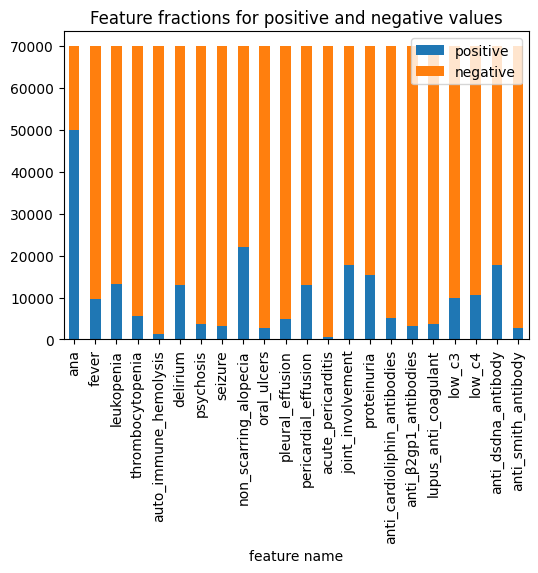

In [25]:
pos_neg_df = plot_feature_fractions(df)

#### Features and their fractions